<a href="https://colab.research.google.com/github/springboardmentor74280b-design/Habitability-of-Exoplanets/blob/ChandraShekar/ExoPlanet_Habitability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting the Habitability of Exoplanets Using Machine Learning**

The discovery of exoplanets has accelerated in recent years, but identifying which planets could
potentially support life remains a challenge. Current astronomical methods are limited by observational
constraints, massive datasets, and complex planetary parameters.
This project, ExoHabitAI, aims to use machine learning to predict the habitability of exoplanets based on
physical, orbital, and stellar features. The system evaluates exoplanetary characteristics such as radius,
mass, orbital period, equilibrium temperature, and host star parameters to classify planets as potentially
habitable or not. By leveraging data-driven models, astronomers and researchers can prioritize
candidate exoplanets for further study, enhancing the efficiency of observational campaigns.

#1. Importing the library files

In [58]:
# ===============================
# Core Libraries
# ===============================
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder
)

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold
)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

from scipy.stats import zscore


# 2. Reading the Dataset

In [59]:
data = pd.read_csv("/content/phl_exoplanet_catalog_2019.csv")

In [60]:
data

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.863300,1.29000
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.784800,1.53000
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.574400,0.83000
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.078500,2.93000
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,K2-296 b,3.0,NaN,NaN,NaN,1.87,0.45,0.2,2019,5/23/19,...,0,Warm,2,0.755038,Virgo,Vir,Virgin,1.870000,4.155456,0.13456
4044,K2-296 c,3.0,NaN,NaN,NaN,2.76,NaN,NaN,2019,5/23/19,...,0,Hot,0,0.363831,Virgo,Vir,Virgin,2.760000,8.047485,0.05769
4045,GJ 1061 b,3.0,1.38000,0.15000,0.16000,NaN,NaN,NaN,2019,9/3/19,...,0,Hot,0,0.588562,Horologium,Hor,Pendulum Clock,1.102775,1.380000,0.02100
4046,GJ 1061 c,3.0,1.75000,0.23000,0.23000,NaN,NaN,NaN,2019,9/3/19,...,0,Warm,1,0.879042,Horologium,Hor,Pendulum Clock,1.178333,1.750000,0.03500


#First 5 rows of the dataset

In [61]:
data.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


#Last 5 rows of the dataset

In [62]:
data.tail()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
4043,K2-296 b,3.0,NaN,NaN,NaN,1.87,0.45,0.2,2019,5/23/19,...,0,Warm,2,0.755038,Virgo,Vir,Virgin,1.870000,4.155456,0.13456
4044,K2-296 c,3.0,NaN,NaN,NaN,2.76,NaN,NaN,2019,5/23/19,...,0,Hot,0,0.363831,Virgo,Vir,Virgin,2.760000,8.047485,0.05769
4045,GJ 1061 b,3.0,1.38,0.15,0.16,NaN,NaN,NaN,2019,9/3/19,...,0,Hot,0,0.588562,Horologium,Hor,Pendulum Clock,1.102775,1.380000,0.02100
4046,GJ 1061 c,3.0,1.75,0.23,0.23,NaN,NaN,NaN,2019,9/3/19,...,0,Warm,1,0.879042,Horologium,Hor,Pendulum Clock,1.178333,1.750000,0.03500
4047,GJ 1061 d,3.0,1.68,0.24,0.25,NaN,NaN,NaN,2019,9/3/19,...,1,Warm,1,0.798200,Horologium,Hor,Pendulum Clock,1.164989,1.680000,0.05400


#Thorough exploration of the dataset (Descriptive Analysis)
Vewing the Columns in the dataset

In [63]:
col = data.columns
for c in col:
    print(c)

P_NAME
P_STATUS
P_MASS
P_MASS_ERROR_MIN
P_MASS_ERROR_MAX
P_RADIUS
P_RADIUS_ERROR_MIN
P_RADIUS_ERROR_MAX
P_YEAR
P_UPDATED
P_PERIOD
P_PERIOD_ERROR_MIN
P_PERIOD_ERROR_MAX
P_SEMI_MAJOR_AXIS
P_SEMI_MAJOR_AXIS_ERROR_MIN
P_SEMI_MAJOR_AXIS_ERROR_MAX
P_ECCENTRICITY
P_ECCENTRICITY_ERROR_MIN
P_ECCENTRICITY_ERROR_MAX
P_INCLINATION
P_INCLINATION_ERROR_MIN
P_INCLINATION_ERROR_MAX
P_OMEGA
P_OMEGA_ERROR_MIN
P_OMEGA_ERROR_MAX
P_TPERI
P_TPERI_ERROR_MIN
P_TPERI_ERROR_MAX
P_ANGULAR_DISTANCE
P_IMPACT_PARAMETER
P_IMPACT_PARAMETER_ERROR_MIN
P_IMPACT_PARAMETER_ERROR_MAX
P_TEMP_MEASURED
P_GEO_ALBEDO
P_GEO_ALBEDO_ERROR_MIN
P_GEO_ALBEDO_ERROR_MAX
P_DETECTION
P_DETECTION_MASS
P_DETECTION_RADIUS
P_ALT_NAMES
P_ATMOSPHERE
S_NAME
S_RA
S_DEC
S_MAG
S_DISTANCE
S_DISTANCE_ERROR_MIN
S_DISTANCE_ERROR_MAX
S_METALLICITY
S_METALLICITY_ERROR_MIN
S_METALLICITY_ERROR_MAX
S_MASS
S_MASS_ERROR_MIN
S_MASS_ERROR_MAX
S_RADIUS
S_RADIUS_ERROR_MIN
S_RADIUS_ERROR_MAX
S_TYPE
S_AGE
S_AGE_ERROR_MIN
S_AGE_ERROR_MAX
S_TEMPERATURE
S_TEMPERATURE

Shape of the dataset


In [64]:
print(data.shape)

(4048, 112)


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


In [66]:
data.describe()

,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_PERIOD,P_PERIOD_ERROR_MIN,...,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
count,4048.0,1598.000000,1467.000000,1467.000000,3139.000000,3105.000000,3105.000000,4048.000000,3.938000e+03,3.807000e+03,...,3786.000000,3.083000e+03,3281.000000,4048.000000,4048.000000,4048.000000,3721.000000,4048.000000,4048.000000,3978.000000
mean,3.0,798.384920,-152.292232,190.289692,4.191426,-0.483990,0.621867,2014.212945,2.309342e+03,-1.073631e+03,...,3.513348,1.768991e+35,0.440103,0.049654,0.034091,0.021986,0.261252,5.588647,323.089993,4.011385
std,0.0,1406.808654,783.366353,1082.061976,4.776830,1.409048,2.007592,3.704839,1.167012e+05,5.943181e+04,...,5.463171,6.944274e+36,0.074285,0.217256,0.181485,0.195731,0.131333,5.392733,965.084290,62.389968
min,3.0,0.019070,-24965.390000,0.000000,0.336300,-54.592700,0.000000,1989.000000,9.070629e-02,-3.650000e+06,...,0.002405,7.293660e-05,0.030707,0.000000,0.000000,0.000000,0.006768,0.000000,0.000000,0.004400
25%,3.0,26.548968,-79.457001,4.449592,1.569400,-0.526870,0.145730,2014.000000,4.497336e+00,-1.129000e-03,...,1.740762,5.264169e-01,0.420337,0.000000,0.000000,0.000000,0.196982,1.703920,3.628101,0.053000
50%,3.0,273.332080,-24.154928,25.108412,2.331680,-0.235410,0.325090,2016.000000,1.187053e+01,-9.392000e-05,...,2.568600,1.429118e+00,0.448357,0.000000,0.000000,0.000000,0.271192,2.667980,7.815324,0.102199
75%,3.0,806.488560,-4.392383,85.813561,3.553570,-0.134520,0.661390,2016.000000,4.186661e+01,-1.594000e-05,...,3.661581,2.641037e+00,0.472140,0.000000,0.000000,0.000000,0.303346,11.770500,149.379160,0.260507
max,3.0,17668.059000,0.270000,26630.808000,77.349000,0.450000,68.919080,2019.000000,7.300000e+06,3.200000e-02,...,104.112780,2.726899e+38,1.322542,1.000000,1.000000,2.000000,0.931208,77.349000,17668.059000,2500.000000


Checking for missing data before preprocessing


In [67]:
data.isnull().sum()

,0
P_NAME,0
P_STATUS,0
P_MASS,2450
P_MASS_ERROR_MIN,2581
P_MASS_ERROR_MAX,2581
...,...
S_CONSTELLATION_ABR,0
S_CONSTELLATION_ENG,0
P_RADIUS_EST,0
P_MASS_EST,0


In [68]:
data.isnull().sum()[data.isnull().sum() > 0]

,0
P_MASS,2450
P_MASS_ERROR_MIN,2581
P_MASS_ERROR_MAX,2581
P_RADIUS,909
P_RADIUS_ERROR_MIN,943
...,...
S_ABIO_ZONE,965
S_TIDAL_LOCK,767
P_TYPE_TEMP,327
P_ESI,327


In [69]:
print(data['P_HABITABLE'])

0       0
1       0
2       0
3       0
4       0
       ..
4043    2
4044    0
4045    0
4046    1
4047    1
Name: P_HABITABLE, Length: 4048, dtype: int64


In [70]:
unique_values = data['P_HABITABLE'].unique()

print("Unique values in 'species' column:", unique_values)


Unique values in 'species' column: [0 2 1]


In [71]:
data['P_HABITABLE'].value_counts()

,count
P_HABITABLE,
0,3993
2,34
1,21


**Separate Numerical & Categorical Columns**

In [72]:
num_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes(include=['object']).columns

print("Numerical Columns:", len(num_cols))
print("Categorical Columns:", len(cat_cols))

Numerical Columns: 98
Categorical Columns: 14


**Descriptive Statistics (Numerical)**

In [73]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
P_STATUS,4048.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000
P_MASS,1598.0,798.384920,1406.808654,0.019070,26.548968,273.332080,806.488560,17668.059000
P_MASS_ERROR_MIN,1467.0,-152.292232,783.366353,-24965.390000,-79.457001,-24.154928,-4.392383,0.270000
P_MASS_ERROR_MAX,1467.0,190.289692,1082.061976,0.000000,4.449592,25.108412,85.813561,26630.808000
P_RADIUS,3139.0,4.191426,4.776830,0.336300,1.569400,2.331680,3.553570,77.349000
...,...,...,...,...,...,...,...,...
P_HABITABLE,4048.0,0.021986,0.195731,0.000000,0.000000,0.000000,0.000000,2.000000
P_ESI,3721.0,0.261252,0.131333,0.006768,0.196982,0.271192,0.303346,0.931208
P_RADIUS_EST,4048.0,5.588647,5.392733,0.000000,1.703920,2.667980,11.770500,77.349000
P_MASS_EST,4048.0,323.089993,965.084290,0.000000,3.628101,7.815324,149.379160,17668.059000


**Descriptive Statistics (Categorical)**

In [74]:
data[cat_cols].describe().T

,count,unique,top,freq
P_NAME,4048,4048,psi 1 Dra B b,1
P_UPDATED,4048,184,2016-05-10,1282
P_DETECTION,4048,10,Transit,3114
S_NAME,4048,3010,Kepler-90,8
S_TYPE,1370,210,G0 V,56
S_ALT_NAMES,4048,584,",",3269
P_TYPE,4031,6,Jovian,1302
S_TYPE_TEMP,3912,7,G,1792
S_RA_T,4048,3010,18 57 44.0416,8
S_DEC_T,4048,3010,+49 18 18.5796,8


**Missing Value Analysis (Column-wise)**

In [75]:
missing_count = data.isnull().sum()
missing_percent = (missing_count / len(data)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_count,
    'Missing_Percentage': missing_percent
})

missing_df[missing_df['Missing_Count'] > 0].sort_values(
    by='Missing_Percentage', ascending=False
)

,Missing_Count,Missing_Percentage
P_DETECTION_MASS,4048,100.000000
P_DETECTION_RADIUS,4048,100.000000
P_ALT_NAMES,4048,100.000000
P_GEO_ALBEDO,4048,100.000000
S_DISC,4048,100.000000
...,...,...
P_DISTANCE_EFF,70,1.729249
P_SEMI_MAJOR_AXIS_EST,70,1.729249
P_PERIASTRON,70,1.729249
P_TYPE,17,0.419960


# Missing Values Visualization

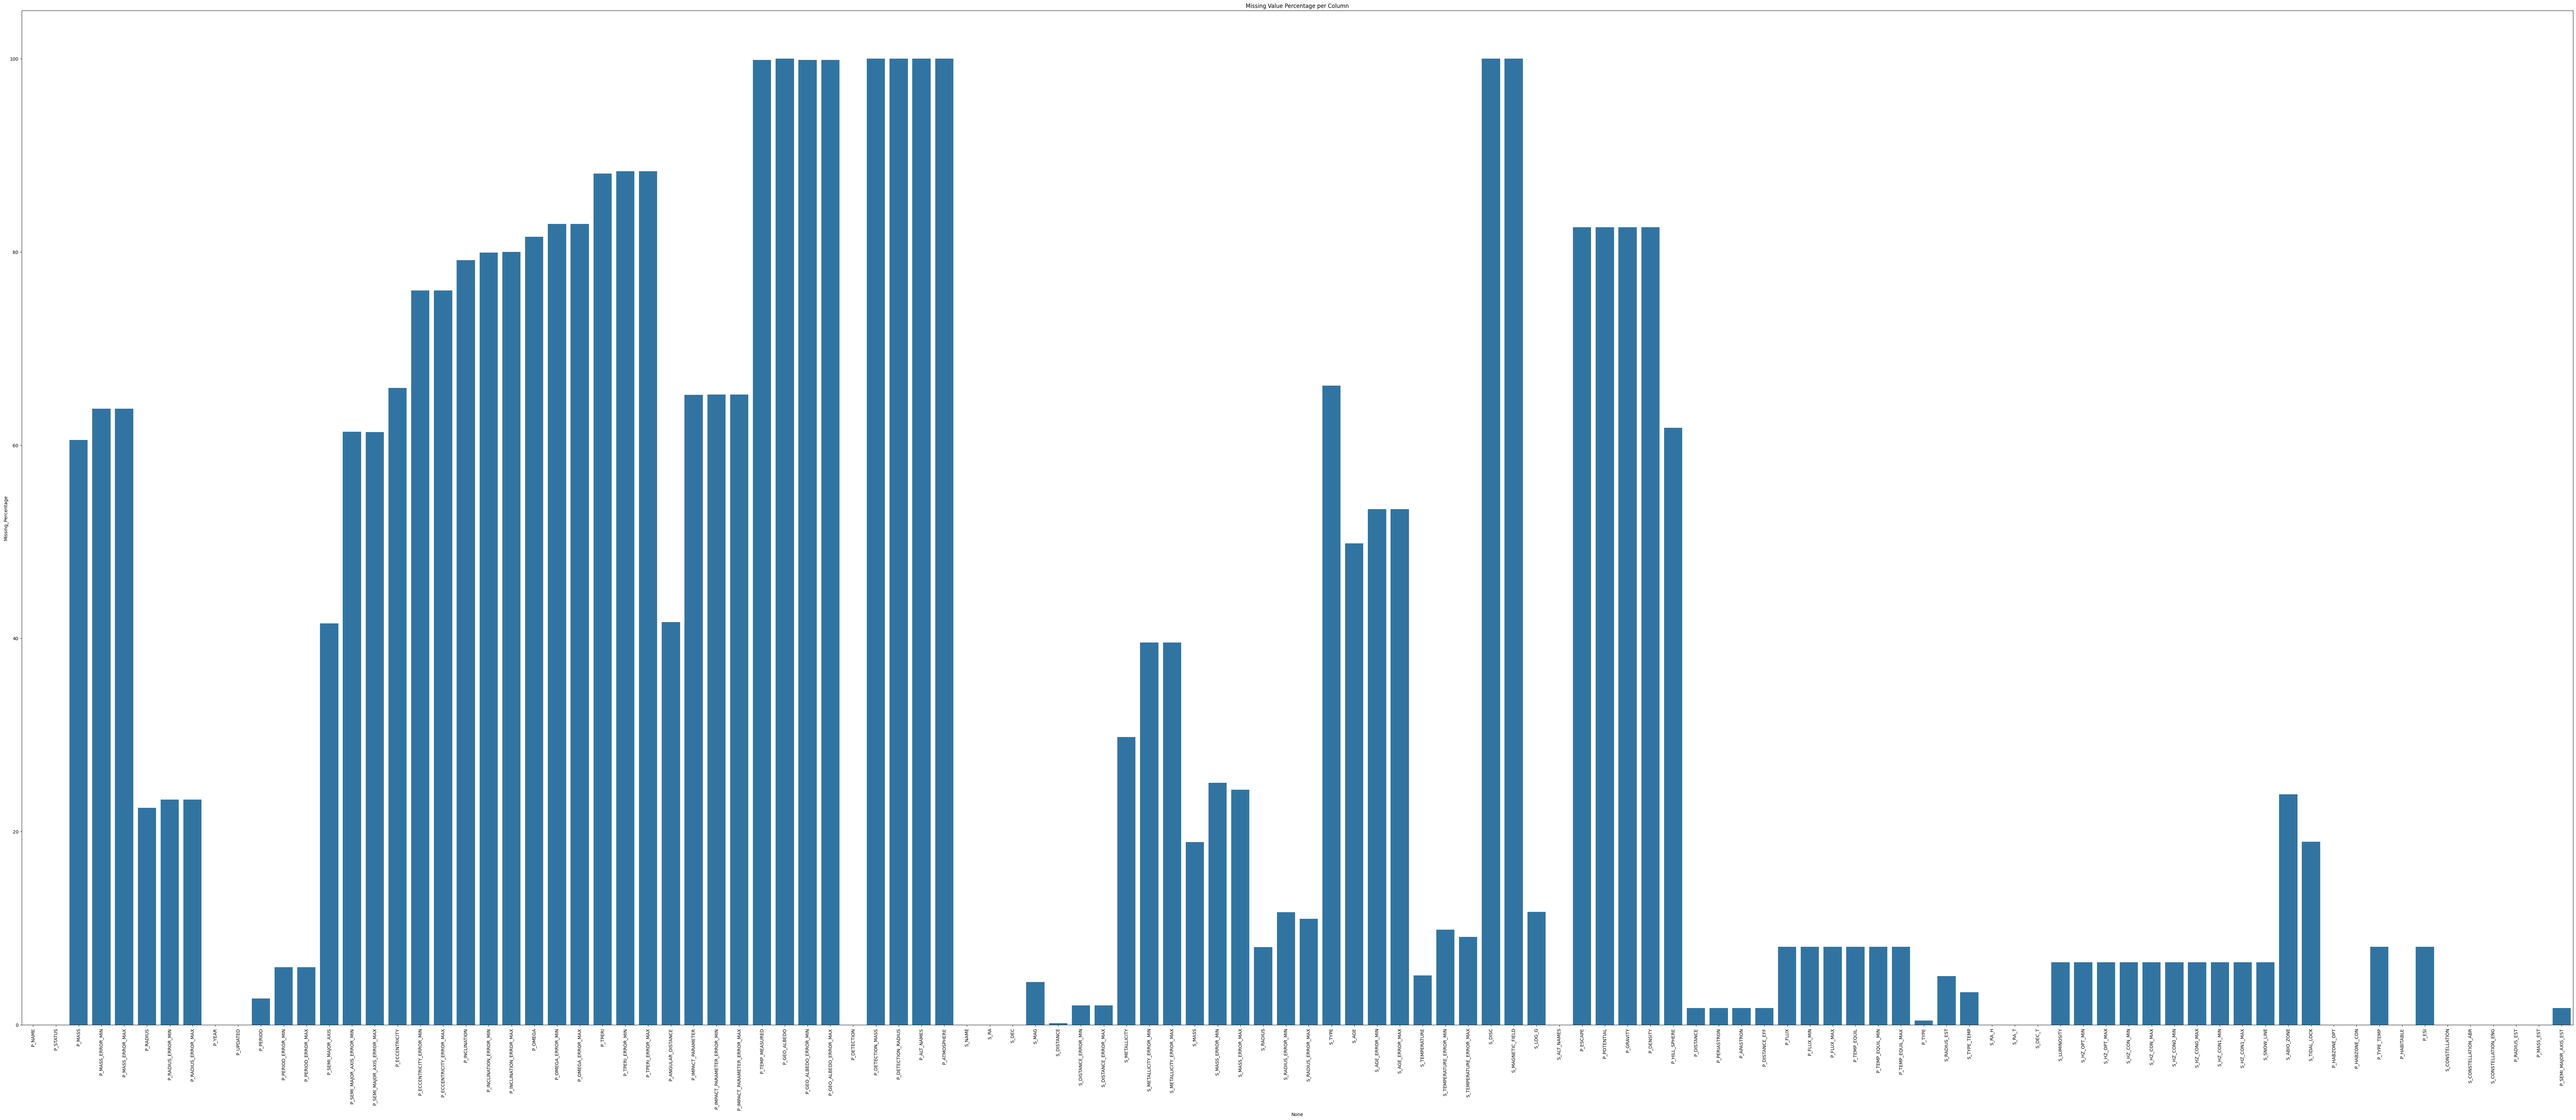

In [76]:
plt.figure(figsize=(100, 40))
sns.barplot(
    x=missing_df.index,
    y=missing_df['Missing_Percentage']
)
plt.xticks(rotation=90)
plt.title("Missing Value Percentage per Column")
plt.show()

# Distribution Analysis

**Histogram (Planet Mass)**

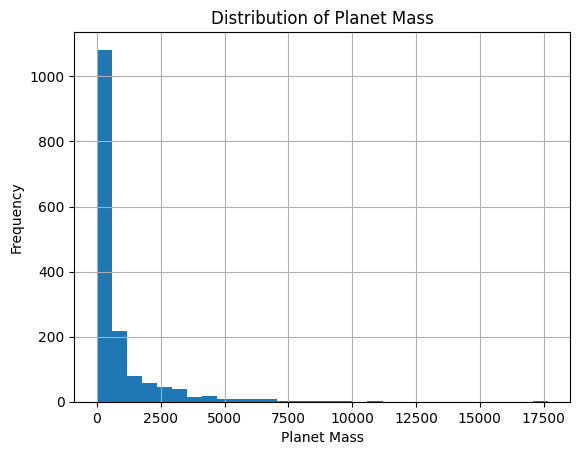

In [77]:
data['P_MASS'].hist(bins=30)
plt.title("Distribution of Planet Mass")
plt.xlabel("Planet Mass")
plt.ylabel("Frequency")
plt.show()

**Boxplot (Outliers)**

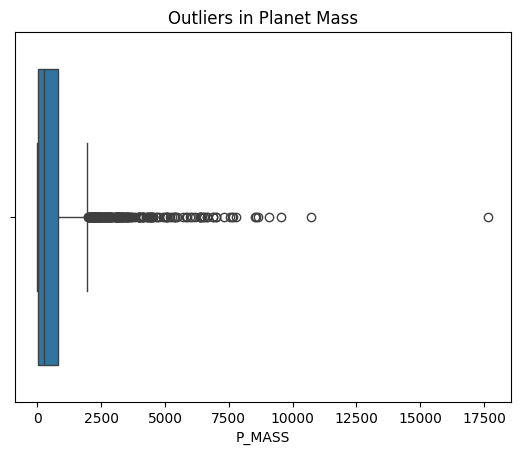

In [78]:
sns.boxplot(x=data['P_MASS'])
plt.title("Outliers in Planet Mass")
plt.show()

**Correlation Analysis**

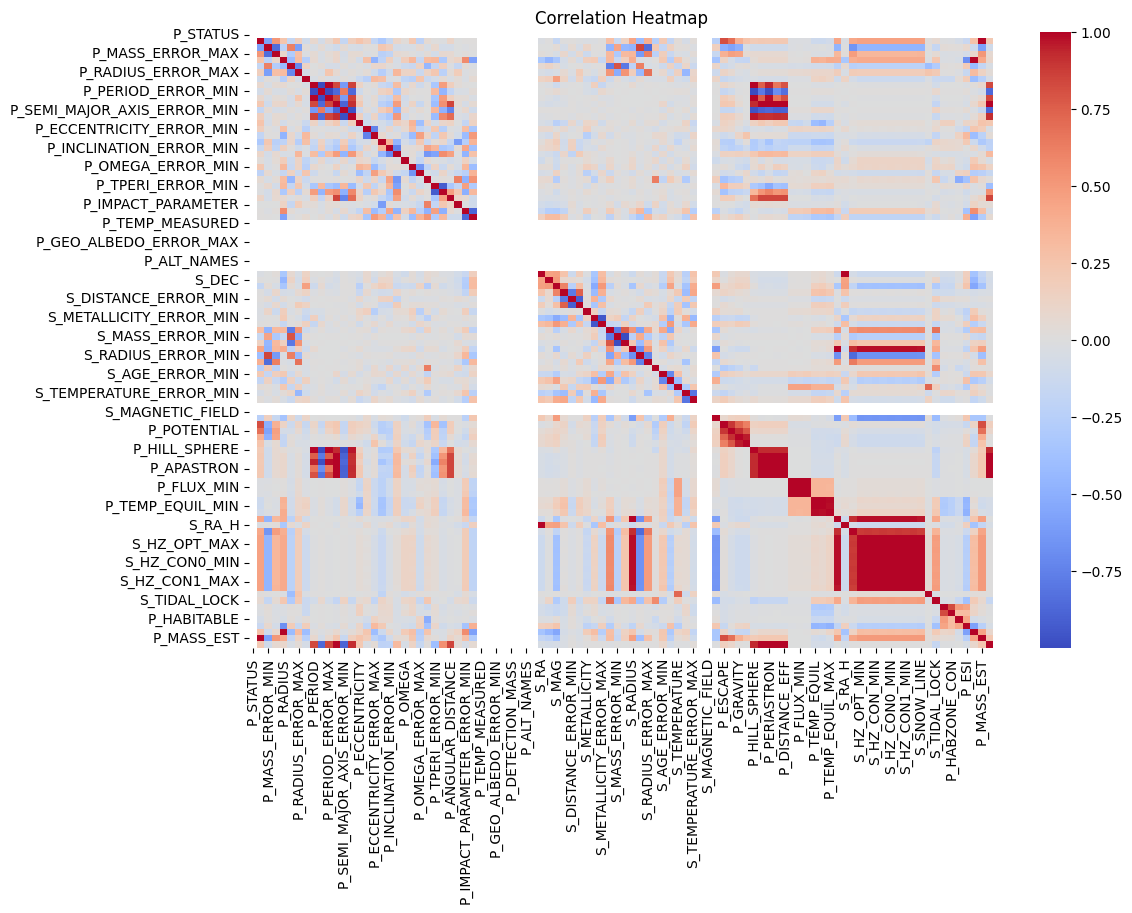

In [79]:
corr_matrix = data[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

# Habitability Analysis

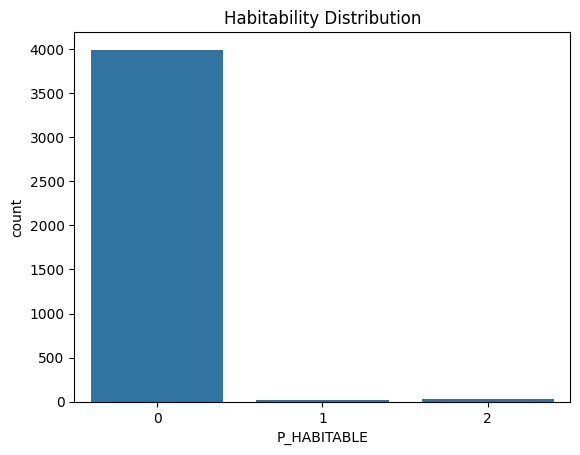

In [80]:
sns.countplot(x='P_HABITABLE', data=data)
plt.title("Habitability Distribution")
plt.show()

Stellar Temperature vs Habitability

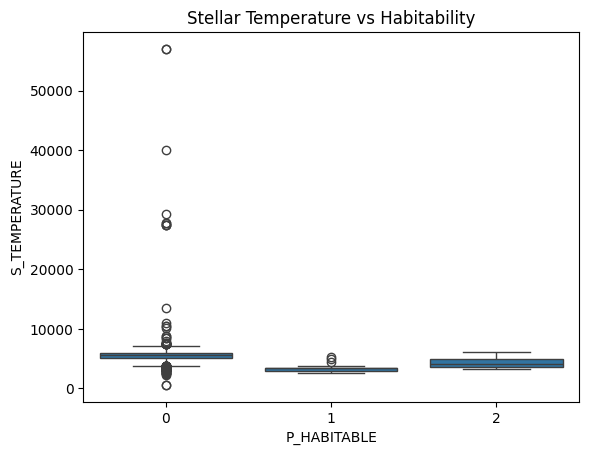

In [81]:
sns.boxplot(
    x='P_HABITABLE',
    y='S_TEMPERATURE',
    data=data
)
plt.title("Stellar Temperature vs Habitability")
plt.show()

Key Feature Summary

In [82]:
important_features = [
    'P_MASS', 'P_RADIUS', 'P_TEMP_EQUIL',
    'P_FLUX', 'S_TEMPERATURE', 'S_LUMINOSITY',
    'P_ESI'
]

data[important_features].describe()

,P_MASS,P_RADIUS,P_TEMP_EQUIL,P_FLUX,S_TEMPERATURE,S_LUMINOSITY,P_ESI
count,1598.000000,3139.000000,3721.000000,3.721000e+03,3841.000000,3.786000e+03,3721.000000
mean,798.384920,4.191426,804.193202,6.166291e+02,5490.154056,5.786277e+00,0.261252
std,1406.808654,4.776830,459.516962,1.141227e+04,1764.957631,4.923779e+01,0.131333
min,0.019070,0.336300,2.688197,1.239553e-08,575.000000,7.933139e-07,0.006768
25%,26.548968,1.569400,472.076010,1.191188e+01,5020.000000,4.156723e-01,0.196982
50%,273.332080,2.331680,740.248470,7.139806e+01,5598.000000,9.050349e-01,0.271192
75%,806.488560,3.553570,1057.567300,2.983043e+02,5921.000000,1.839120e+00,0.303346
max,17668.059000,77.349000,7056.775700,5.886344e+05,57000.000000,1.486896e+03,0.931208


**Outlier Detection (Z-Score)**

In [83]:
z_scores = np.abs(zscore(data[num_cols], nan_policy='omit'))
outliers = (z_scores > 3).sum(axis=0)

outliers[outliers > 0]

/tmp/ipython-input-2914232433.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(zscore(data[num_cols], nan_policy='omit'))


array([ 41,  13,   9,  34,  13,  14, 110,   2,   2,   2,  15,   7,   7,
        29,  14,  11,  28,  17,  11,   1,   8,  14,   5,   6,   7,   6,
         2,   4,   4,  13,  18,  59,  59,  63,  34,  31,  35,  16,   5,
         5,  42,  10,  10,   2,  11,   2,  11,  21,  47,  70,  17,  12,
         8,   8,  10,  20,  19,  20,  19,   3,   3,   3,  21,  22,  25,
        44,  23,  60,  58,  60,  58,  60,  58,  60,  58,  61,   2,  68,
       201, 138,  55,  74,   9,  97,  19])

Dataset Summary

In [84]:
summary = {
    "Total Rows": data.shape[0],
    "Total Columns": data.shape[1],
    "Numerical Columns": len(num_cols),
    "Categorical Columns": len(cat_cols),
    "Total Missing Values": data.isnull().sum().sum()
}

summary

{'Total Rows': 4048,
 'Total Columns': 112,
 'Numerical Columns': 98,
 'Categorical Columns': 14,
 'Total Missing Values': np.int64(149723)}

# 3. Data Preprocessing

In [85]:
data_preprocessed = data.copy()

In [86]:
must_keep_features = [
    # Planet physical
    'P_RADIUS', 'P_RADIUS_EST',
    'P_MASS', 'P_MASS_EST',
    'P_DENSITY',
    'P_TEMP_EQUIL', 'P_TEMP_MEASURED',

    # Orbital
    'P_PERIOD',
    'P_SEMI_MAJOR_AXIS', 'P_SEMI_MAJOR_AXIS_EST',

    # Star properties
    'S_TYPE', 'S_TYPE_TEMP',
    'S_LUMINOSITY',
    'S_TEMPERATURE',
    'S_METALLICITY'
]

**Drop High-Missing Columns**

In [87]:
threshold = 0.5 * len(data_preprocessed)

cols_to_drop = [
    col for col in data_preprocessed.columns
    if data_preprocessed[col].isnull().sum() > threshold
    and col not in must_keep_features
]

data_preprocessed.drop(columns=cols_to_drop, inplace=True)

print("Dropped columns:", len(cols_to_drop))
print("Remaining columns:", data_preprocessed.shape[1])

Dropped columns: 34
Remaining columns: 78


In [88]:
print(cols_to_drop)

['P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX', 'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_ECCENTRICITY', 'P_ECCENTRICITY_ERROR_MIN', 'P_ECCENTRICITY_ERROR_MAX', 'P_INCLINATION', 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION_ERROR_MAX', 'P_OMEGA', 'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_TPERI', 'P_TPERI_ERROR_MIN', 'P_TPERI_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_IMPACT_PARAMETER_ERROR_MIN', 'P_IMPACT_PARAMETER_ERROR_MAX', 'P_GEO_ALBEDO', 'P_GEO_ALBEDO_ERROR_MIN', 'P_GEO_ALBEDO_ERROR_MAX', 'P_DETECTION_MASS', 'P_DETECTION_RADIUS', 'P_ALT_NAMES', 'P_ATMOSPHERE', 'S_AGE_ERROR_MIN', 'S_AGE_ERROR_MAX', 'S_DISC', 'S_MAGNETIC_FIELD', 'P_ESCAPE', 'P_POTENTIAL', 'P_GRAVITY', 'P_HILL_SPHERE']


In [89]:
print(data_preprocessed)

          P_NAME  P_STATUS      P_MASS  P_RADIUS  P_RADIUS_ERROR_MIN  \
0       11 Com b       3.0  6165.86330       NaN                 NaN   
1       11 UMi b       3.0  4684.78480       NaN                 NaN   
2       14 And b       3.0  1525.57440       NaN                 NaN   
3       14 Her b       3.0  1481.07850       NaN                 NaN   
4     16 Cyg B b       3.0   565.73385       NaN                 NaN   
...          ...       ...         ...       ...                 ...   
4043    K2-296 b       3.0         NaN      1.87                0.45   
4044    K2-296 c       3.0         NaN      2.76                 NaN   
4045   GJ 1061 b       3.0     1.38000       NaN                 NaN   
4046   GJ 1061 c       3.0     1.75000       NaN                 NaN   
4047   GJ 1061 d       3.0     1.68000       NaN                 NaN   

      P_RADIUS_ERROR_MAX  P_YEAR   P_UPDATED     P_PERIOD  P_PERIOD_ERROR_MIN  \
0                    NaN    2007  2014-05-14   326.030

**Identifying Column Types (After Filtering)**

In [90]:
num_cols = data_preprocessed.select_dtypes(include=[np.number]).columns
cat_cols = data_preprocessed.select_dtypes(include=['object']).columns

print("Numerical Columns:", len(num_cols))
print("Categorical Columns:", len(cat_cols))

Numerical Columns: 64
Categorical Columns: 14


# Impute Missing Values (Scientifically Safe)
🔹 Numerical → Median (Robust to astrophysical outliers)

In [91]:
for col in num_cols:
    data_preprocessed[col] = data_preprocessed[col].fillna(
        data_preprocessed[col].median()
    )

🔹 Categorical → Mode

In [92]:
for col in cat_cols:
    data_preprocessed[col] = data_preprocessed[col].fillna(
        data_preprocessed[col].mode()[0]
    )

**Encode Categorical Features**

In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    data_preprocessed[col] = le.fit_transform(
        data_preprocessed[col].astype(str)
    )

**Final Validation Check**

In [94]:
print("Final Shape:", data_preprocessed.shape)
print("Remaining Missing Values:", data_preprocessed.isnull().sum().sum())

Final Shape: (4048, 78)
Remaining Missing Values: 0


**Save as NEW File**

In [95]:
data_preprocessed.to_csv(
    "exoplanet_preprocessed.csv",
    index=False
)

print("Saved: exoplanet_preprocessed.csv")

Saved: exoplanet_preprocessed.csv


#Distribution of Frequency Analysis

In [96]:
'''dist_features = [
    'P_RADIUS', 'P_MASS', 'P_DENSITY',
    'P_TEMP_EQUIL', 'P_PERIOD',
    'S_TEMPERATURE', 'S_LUMINOSITY'
]

for col in dist_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()'''

'dist_features = [\n    \'P_RADIUS\', \'P_MASS\', \'P_DENSITY\',\n    \'P_TEMP_EQUIL\', \'P_PERIOD\',\n    \'S_TEMPERATURE\', \'S_LUMINOSITY\'\n]\n\nfor col in dist_features:\n    plt.figure(figsize=(6,4))\n    sns.histplot(data[col], kde=True)\n    plt.title(f"Distribution of {col}")\n    plt.show()'

In [97]:
dist_features = [
    'P_RADIUS', 'P_MASS', 'P_DENSITY',
    'P_TEMP_EQUIL', 'P_PERIOD',
    'S_TEMPERATURE', 'S_LUMINOSITY'
]

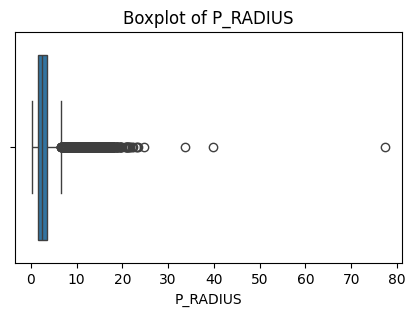

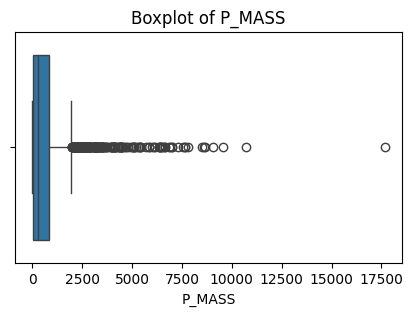

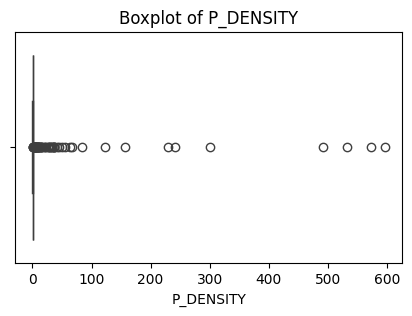

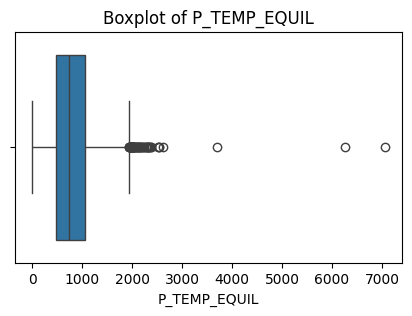

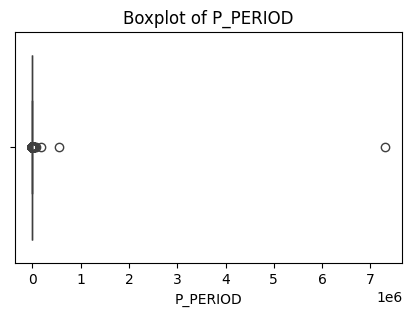

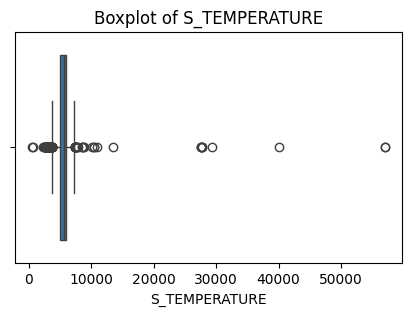

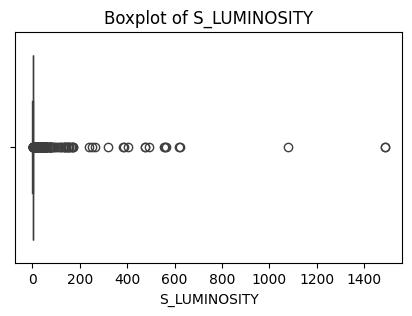

In [98]:
for col in dist_features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

#Finding the Correlation between each feature

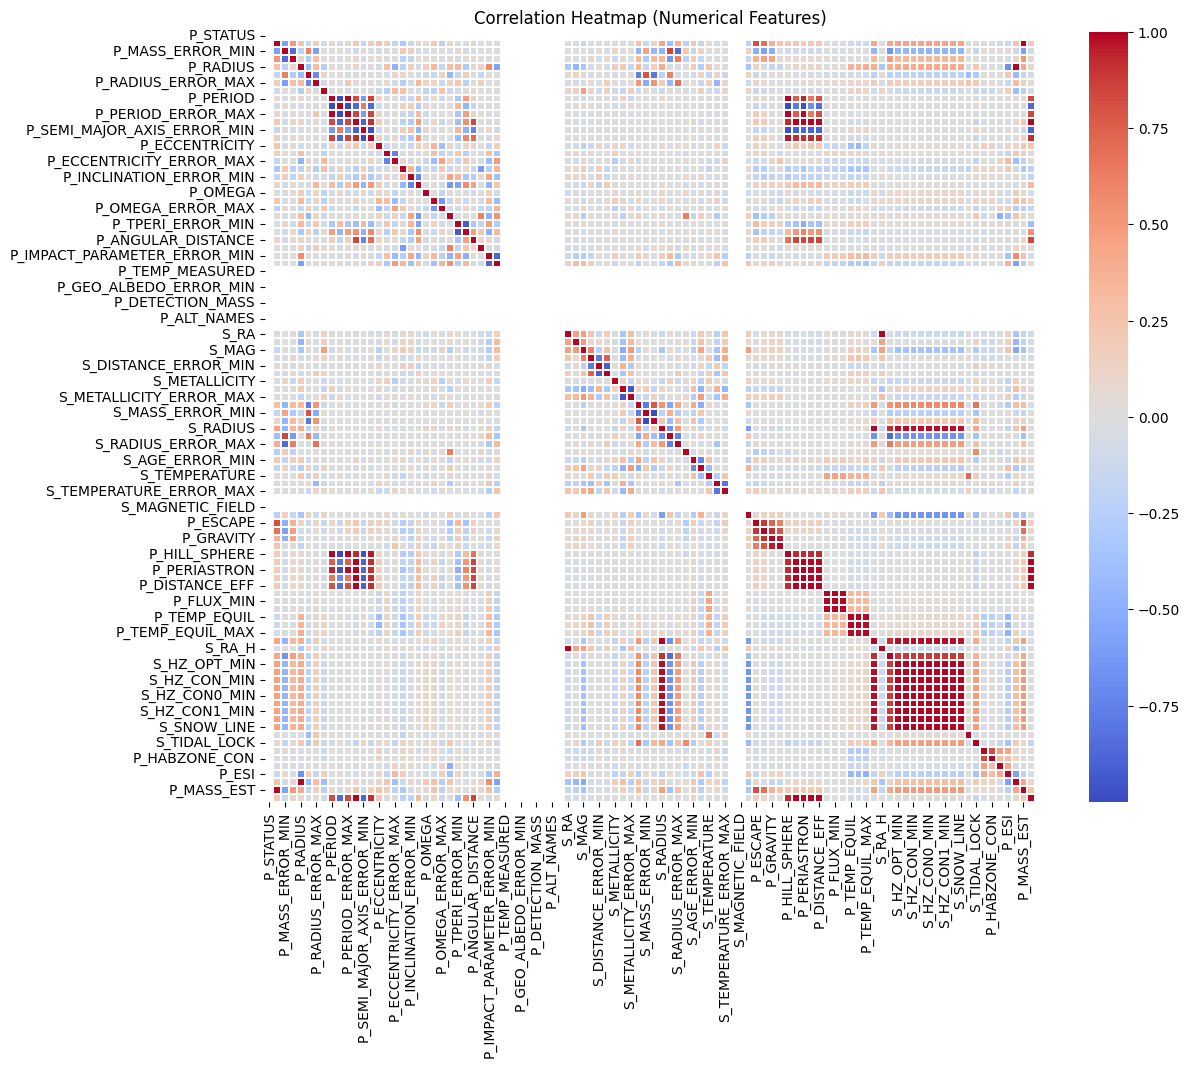

In [99]:
numeric_df = data.select_dtypes(include=[np.number])

corr = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.3
)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [100]:
# Get upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find highly correlated features
high_corr = [
    column for column in upper.columns
    if any(abs(upper[column]) > 0.85)
]

print("Highly correlated features (>0.85):")
high_corr

Highly correlated features (>0.85):


['P_PERIOD_ERROR_MIN',
 'P_PERIOD_ERROR_MAX',
 'P_SEMI_MAJOR_AXIS',
 'P_SEMI_MAJOR_AXIS_ERROR_MIN',
 'P_SEMI_MAJOR_AXIS_ERROR_MAX',
 'P_TPERI_ERROR_MAX',
 'P_IMPACT_PARAMETER_ERROR_MAX',
 'S_DISTANCE_ERROR_MAX',
 'S_METALLICITY_ERROR_MAX',
 'S_MASS_ERROR_MAX',
 'S_RADIUS_ERROR_MIN',
 'S_RADIUS_ERROR_MAX',
 'P_POTENTIAL',
 'P_GRAVITY',
 'P_DENSITY',
 'P_HILL_SPHERE',
 'P_DISTANCE',
 'P_PERIASTRON',
 'P_APASTRON',
 'P_DISTANCE_EFF',
 'P_FLUX_MIN',
 'P_FLUX_MAX',
 'P_TEMP_EQUIL_MIN',
 'P_TEMP_EQUIL_MAX',
 'S_RADIUS_EST',
 'S_RA_H',
 'S_LUMINOSITY',
 'S_HZ_OPT_MIN',
 'S_HZ_OPT_MAX',
 'S_HZ_CON_MIN',
 'S_HZ_CON_MAX',
 'S_HZ_CON0_MIN',
 'S_HZ_CON0_MAX',
 'S_HZ_CON1_MIN',
 'S_HZ_CON1_MAX',
 'S_SNOW_LINE',
 'P_RADIUS_EST',
 'P_MASS_EST',
 'P_SEMI_MAJOR_AXIS_EST']

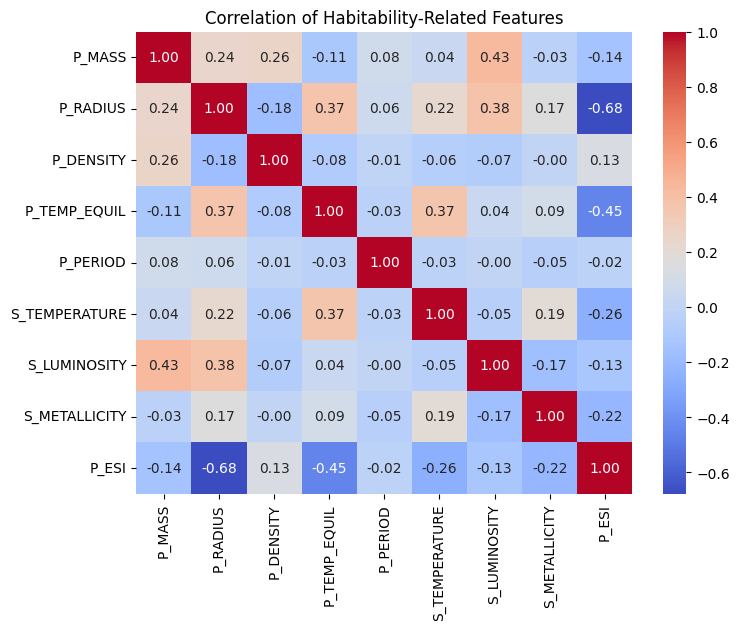

In [101]:
important_features = [
    'P_MASS', 'P_RADIUS', 'P_DENSITY',
    'P_TEMP_EQUIL', 'P_PERIOD',
    'S_TEMPERATURE', 'S_LUMINOSITY',
    'S_METALLICITY', 'P_ESI'
]

plt.figure(figsize=(8,6))
sns.heatmap(
    data[important_features].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation of Habitability-Related Features')
plt.show()

#4. Splitting the data

In [102]:
print(data_preprocessed['P_HABITABLE'].value_counts())
print(data_preprocessed['P_HABITABLE'].dtype)

P_HABITABLE
0    3993
2      34
1      21
Name: count, dtype: int64
int64


In [103]:
target_col = 'P_HABITABLE'

# Target
y = data_preprocessed[target_col]

# Features
X = data_preprocessed.drop(columns=[target_col])


# Print the shapes of X and y to confirm the split

In [104]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (4048, 77)
y shape: (4048,)


In [105]:
X

,P_NAME,P_STATUS,P_MASS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,...,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0,3.0,6165.86330,2.33168,-0.23541,0.32509,2007,0,326.030000,-0.3200,...,0,0,1,0.083813,24,24,5,12.082709,6165.863300,1.29000
1,1,3.0,4684.78480,2.33168,-0.23541,0.32509,2009,146,516.219970,-3.2000,...,0,0,1,0.082414,83,83,42,12.229641,4684.784800,1.53000
2,2,3.0,1525.57440,2.33168,-0.23541,0.32509,2008,0,185.840000,-0.2300,...,0,0,1,0.081917,0,0,2,12.848516,1525.574400,0.83000
3,3,3.0,1481.07850,2.33168,-0.23541,0.32509,2002,146,1773.400000,-2.5000,...,0,0,0,0.145241,39,39,34,12.865261,1481.078500,2.93000
4,4,3.0,565.73385,2.33168,-0.23541,0.32509,1996,146,798.500000,-1.0000,...,1,1,2,0.368627,30,30,75,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,1194,3.0,273.33208,1.87000,0.45000,0.20000,2019,182,28.165600,0.0028,...,1,0,2,0.755038,85,85,82,1.870000,4.155456,0.13456
4044,1195,3.0,273.33208,2.76000,-0.23541,0.32509,2019,182,7.906961,0.0000,...,0,0,1,0.363831,85,85,82,2.760000,8.047485,0.05769
4045,129,3.0,1.38000,2.33168,-0.23541,0.32509,2019,183,3.204000,0.0010,...,0,0,1,0.588562,40,40,56,1.102775,1.380000,0.02100
4046,130,3.0,1.75000,2.33168,-0.23541,0.32509,2019,183,6.689000,0.0050,...,1,0,2,0.879042,40,40,56,1.178333,1.750000,0.03500


In [106]:
y

,P_HABITABLE
0,0
1,0
2,0
3,0
4,0
...,...
4043,2
4044,0
4045,0
4046,1


**Scale ONLY Feature Columns**

In [107]:
num_features = X.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

**Check Class Distribution**

P_HABITABLE
0    3993
2      34
1      21
Name: count, dtype: int64


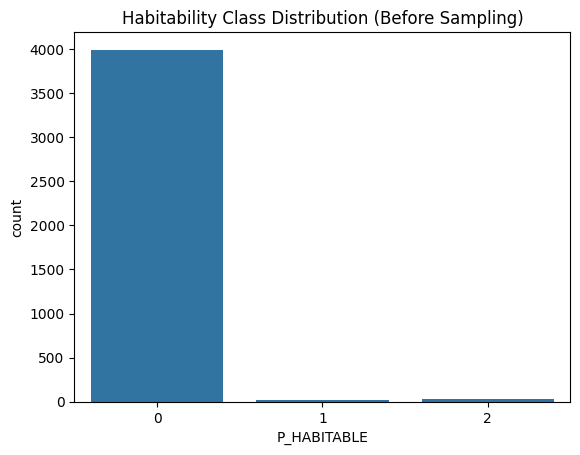

In [108]:
print(y.value_counts())

sns.countplot(x=y)
plt.title("Habitability Class Distribution (Before Sampling)")
plt.show()

#Splitting into Training and Testing sets and balance the class labels

A. Stategic Split

B. Sampling Technique – SMOTE (For Imbalanced Data)

In [110]:
y_class = y.astype(int)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

In [112]:
# Display the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (3238, 77)
Testing features shape: (810, 77)
Training labels shape: (3238,)
Testing labels shape: (810,)


**Verify Stratification Worked**

In [113]:
print("Train distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest distribution:")
print(y_test.value_counts(normalize=True))

Train distribution:
P_HABITABLE
0    0.986411
2    0.008338
1    0.005250
Name: proportion, dtype: float64

Test distribution:
P_HABITABLE
0    0.986420
2    0.008642
1    0.004938
Name: proportion, dtype: float64


**Sampling Technique – SMOTE (For Imbalanced Data)**

In [114]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train, y_train
)

print("After SMOTE:")
print(y_train_smote.value_counts())

After SMOTE:
P_HABITABLE
0    3194
2    3194
1    3194
Name: count, dtype: int64


**Visualize After Sampling**

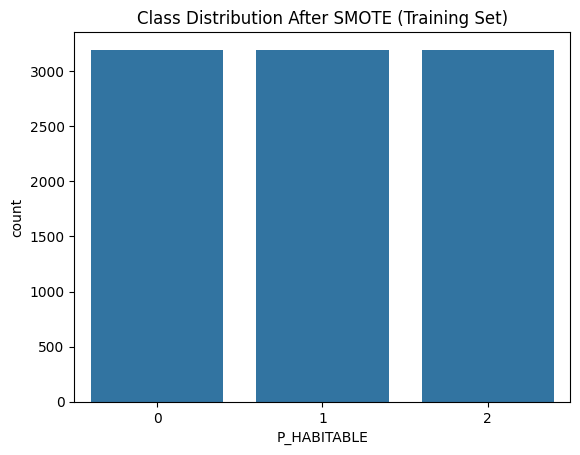

In [115]:
sns.countplot(x=y_train_smote)
plt.title("Class Distribution After SMOTE (Training Set)")
plt.show()

**Final Datasets Ready for ML**

In [116]:
print("Final Training Set:", X_train_smote.shape)
print("Final Test Set:", X_test.shape)

Final Training Set: (9582, 77)
Final Test Set: (810, 77)


# 5. Building The Models

#A. Implimentation of Logistic Regression and analysing the perfomance

In [117]:
log_reg_model = LogisticRegression(
    C=1,  # Regularization strength
    penalty='l2',  # Regularization type, 'l2' is the most common
    solver='lbfgs',  # Optimization algorithm (good for larger datasets)
    max_iter=1000,  # Maximum number of iterations for optimization
    random_state=42,  # For reproducibility
    l1_ratio=None,  # Only used if 'elasticnet' penalty is chosen
)

# Train the model on the training data (X_train, y_train)
log_reg_model.fit(X_train, y_train)

# Make predictions with the trained model
y_pred = log_reg_model.predict(X_test)

In [118]:
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[799,   0,   0],
       [  0,   2,   2],
       [  1,   2,   4]])

In [119]:
 print("\nClassification Report of Logistic Regression:\n",metrics.classification_report(y_test, y_pred))
 print ("---------------------------------------------------------------------")


Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           1       0.50      0.50      0.50         4
           2       0.67      0.57      0.62         7

    accuracy                           0.99       810
   macro avg       0.72      0.69      0.70       810
weighted avg       0.99      0.99      0.99       810

---------------------------------------------------------------------


In [120]:

print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.99
-------------------------------------------------------------------


#B. Implementation of SVM and analysing the perfomance

In [121]:
 # Building a Support Vector Machine on train data
 svc_model = SVC(kernel='linear',random_state=1234, gamma= 'scale')
 svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=1234)

In [122]:
y_pred = svc_model.predict(X_test)

In [123]:
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[799,   0,   0],
       [  0,   3,   1],
       [  0,   0,   7]])

In [124]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           1       1.00      0.75      0.86         4
           2       0.88      1.00      0.93         7

    accuracy                           1.00       810
   macro avg       0.96      0.92      0.93       810
weighted avg       1.00      1.00      1.00       810

---------------------------------------------------------------------


In [125]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 1.00
-------------------------------------------------------------------


#C. Implimenting KNN Classifier and analysing the perfomance

In [126]:
 knn = KNeighborsClassifier(n_neighbors=5)
 classifier = knn.fit(X_train,y_train)
 y_pred = classifier.predict(X_test)

In [127]:
confusion = metrics.confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion

array([[799,   0,   0],
       [  2,   1,   1],
       [  1,   1,   5]])

In [128]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           1       0.50      0.25      0.33         4
           2       0.83      0.71      0.77         7

    accuracy                           0.99       810
   macro avg       0.78      0.65      0.70       810
weighted avg       0.99      0.99      0.99       810

---------------------------------------------------------------------


In [129]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.99
-------------------------------------------------------------------


#D. Implimentation of Decision Tree Classifier and analysing the perfomance

In [131]:
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                       random_state=1234)

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

In [132]:
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[798,   0,   1],
       [  0,   4,   0],
       [  2,   0,   5]])

In [133]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           1       1.00      1.00      1.00         4
           2       0.83      0.71      0.77         7

    accuracy                           1.00       810
   macro avg       0.94      0.90      0.92       810
weighted avg       1.00      1.00      1.00       810

---------------------------------------------------------------------


In [134]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 1.00
-------------------------------------------------------------------


# E. XGBoost Classifier

In [151]:
xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=3, ...)

**Predict Habitability Probability (Ranking)**

In [152]:
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Multi-class ROC-AUC (One-vs-Rest)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC-AUC (OvR):", roc_auc)

Accuracy: 0.9987654320987654

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           1       1.00      1.00      1.00         4
           2       1.00      0.86      0.92         7

    accuracy                           1.00       810
   macro avg       1.00      0.95      0.97       810
weighted avg       1.00      1.00      1.00       810

ROC-AUC (OvR): 1.0


In [153]:
# Use trained XGBoost model
habitability_probs = xgb.predict_proba(X)

# Probability of highest habitability class (Class 2)
data_preprocessed['Habitability_Score_Pred'] = habitability_probs[:, 2]

**Rank Exoplanets**

In [154]:
ranked_planets = data_preprocessed.sort_values(
    by='Habitability_Score_Pred',
    ascending=False
)

ranked_planets[['Habitability_Score_Pred']].head(10)

,Habitability_Score_Pred
2552,0.992782
2931,0.990497
2490,0.990301
2591,0.989716
2205,0.989518
2590,0.985439
1029,0.985081
3166,0.985015
2365,0.984664
4043,0.983840


# F. Random Forest

In [155]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=300,
                       random_state=42)

In [157]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.9962962962962963
Precision: 0.996549375009633
Recall: 0.9962962962962963
F1-score: 0.9958613761067465


In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           1       0.80      1.00      0.89         4
           2       1.00      0.57      0.73         7

    accuracy                           1.00       810
   macro avg       0.93      0.86      0.87       810
weighted avg       1.00      1.00      1.00       810



In [161]:
y_prob = rf.predict_proba(X_test)

roc_auc = roc_auc_score(
    y_test,
    y_prob,
    multi_class='ovr',
    average='weighted'
)

print("ROC-AUC (OvR):", roc_auc)

ROC-AUC (OvR): 1.0


# Model Comparisions

In [162]:
models = {
    "Random Forest": rf,
    "XGBoost": xgb,
    "Decision Tree": dtc,
    "KNN": knn,
    "SVM": svc_model,
    "Logistic Regression": log_reg_model
}

Metric Computation

In [163]:
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    # ROC-AUC requires probability estimates
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
    else:
        roc_auc = np.nan  # SVM without probability=True

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-score": f1_score(y_test, y_pred, average='weighted'),
        "ROC-AUC": roc_auc
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Random Forest,0.996296,0.996549,0.996296,0.995861,1.000000
1,XGBoost,0.998765,0.998767,0.998765,0.998718,1.000000
2,Decision Tree,0.996296,0.996094,0.996296,0.996155,0.953809
3,KNN,0.993827,0.992401,0.993827,0.992865,0.999005
4,SVM,0.998765,0.998920,0.998765,0.998718,NaN
5,Logistic Regression,0.993827,0.993417,0.993827,0.993590,0.999980


PERFORMANCE COMPARISON TABLE

In [164]:
results_df.sort_values(by="F1-score", ascending=False)

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
4,SVM,0.998765,0.998920,0.998765,0.998718,NaN
1,XGBoost,0.998765,0.998767,0.998765,0.998718,1.000000
2,Decision Tree,0.996296,0.996094,0.996296,0.996155,0.953809
0,Random Forest,0.996296,0.996549,0.996296,0.995861,1.000000
5,Logistic Regression,0.993827,0.993417,0.993827,0.993590,0.999980
3,KNN,0.993827,0.992401,0.993827,0.992865,0.999005


from matplotlib import pyplot as plt
_df_0['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['F1-score'].plot(kind='hist', bins=20, title='F1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Recall', y='F1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='F1-score', y='ROC-AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['F1-score'].plot(kind='line', figsize=(8, 4), title='F1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='F1-score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# VISUAL COMPARISON (BAR PLOTS)

Accuracy Comparison

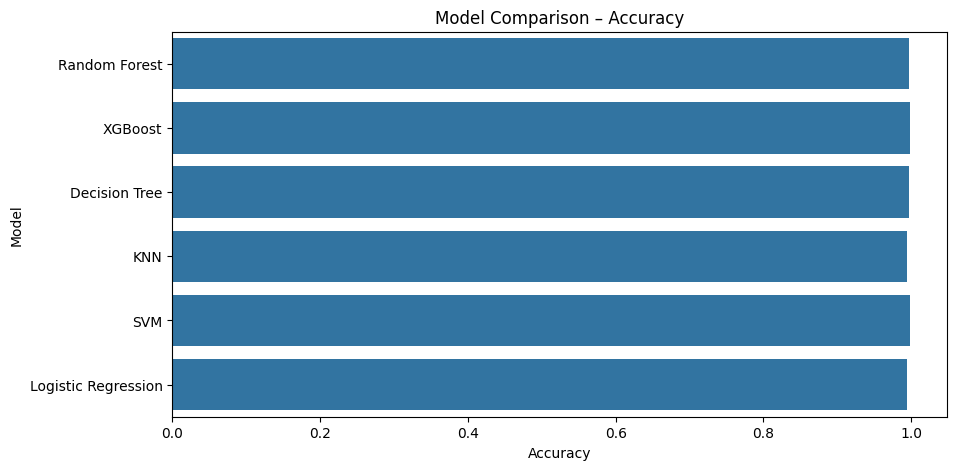

In [165]:
plt.figure(figsize=(10,5))
sns.barplot(x="Accuracy", y="Model", data=results_df)
plt.title("Model Comparison – Accuracy")
plt.show()

**F1-Score Comparison**

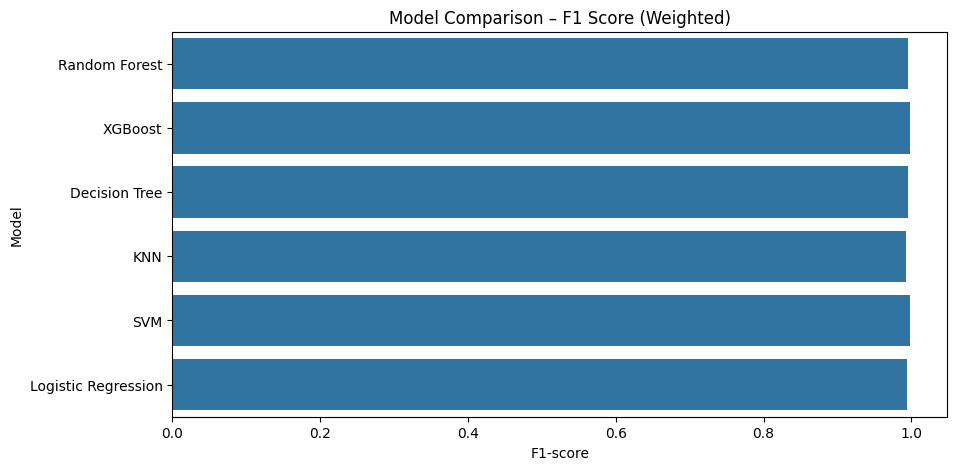

In [166]:
plt.figure(figsize=(10,5))
sns.barplot(x="F1-score", y="Model", data=results_df)
plt.title("Model Comparison – F1 Score (Weighted)")
plt.show()

**ROC-AUC Comparison**

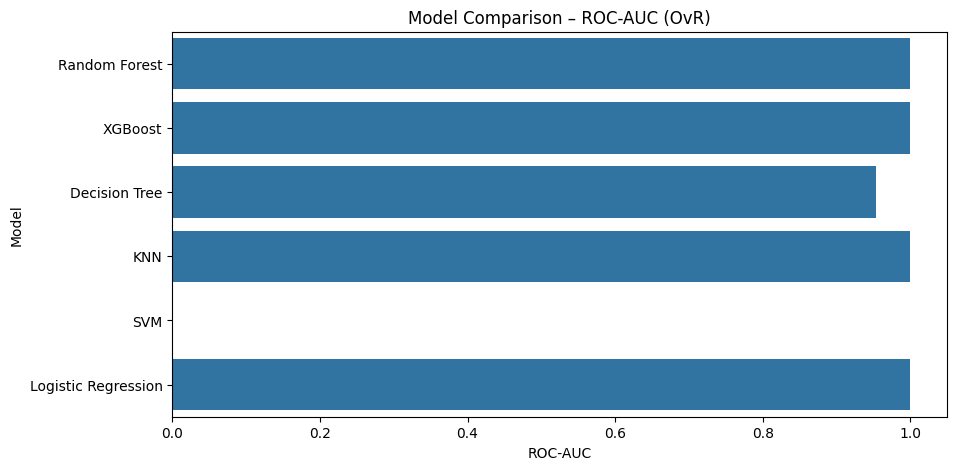

In [167]:
plt.figure(figsize=(10,5))
sns.barplot(x="ROC-AUC", y="Model", data=results_df)
plt.title("Model Comparison – ROC-AUC (OvR)")
plt.show()

# CONFUSION MATRICES FOR ALL MODELS

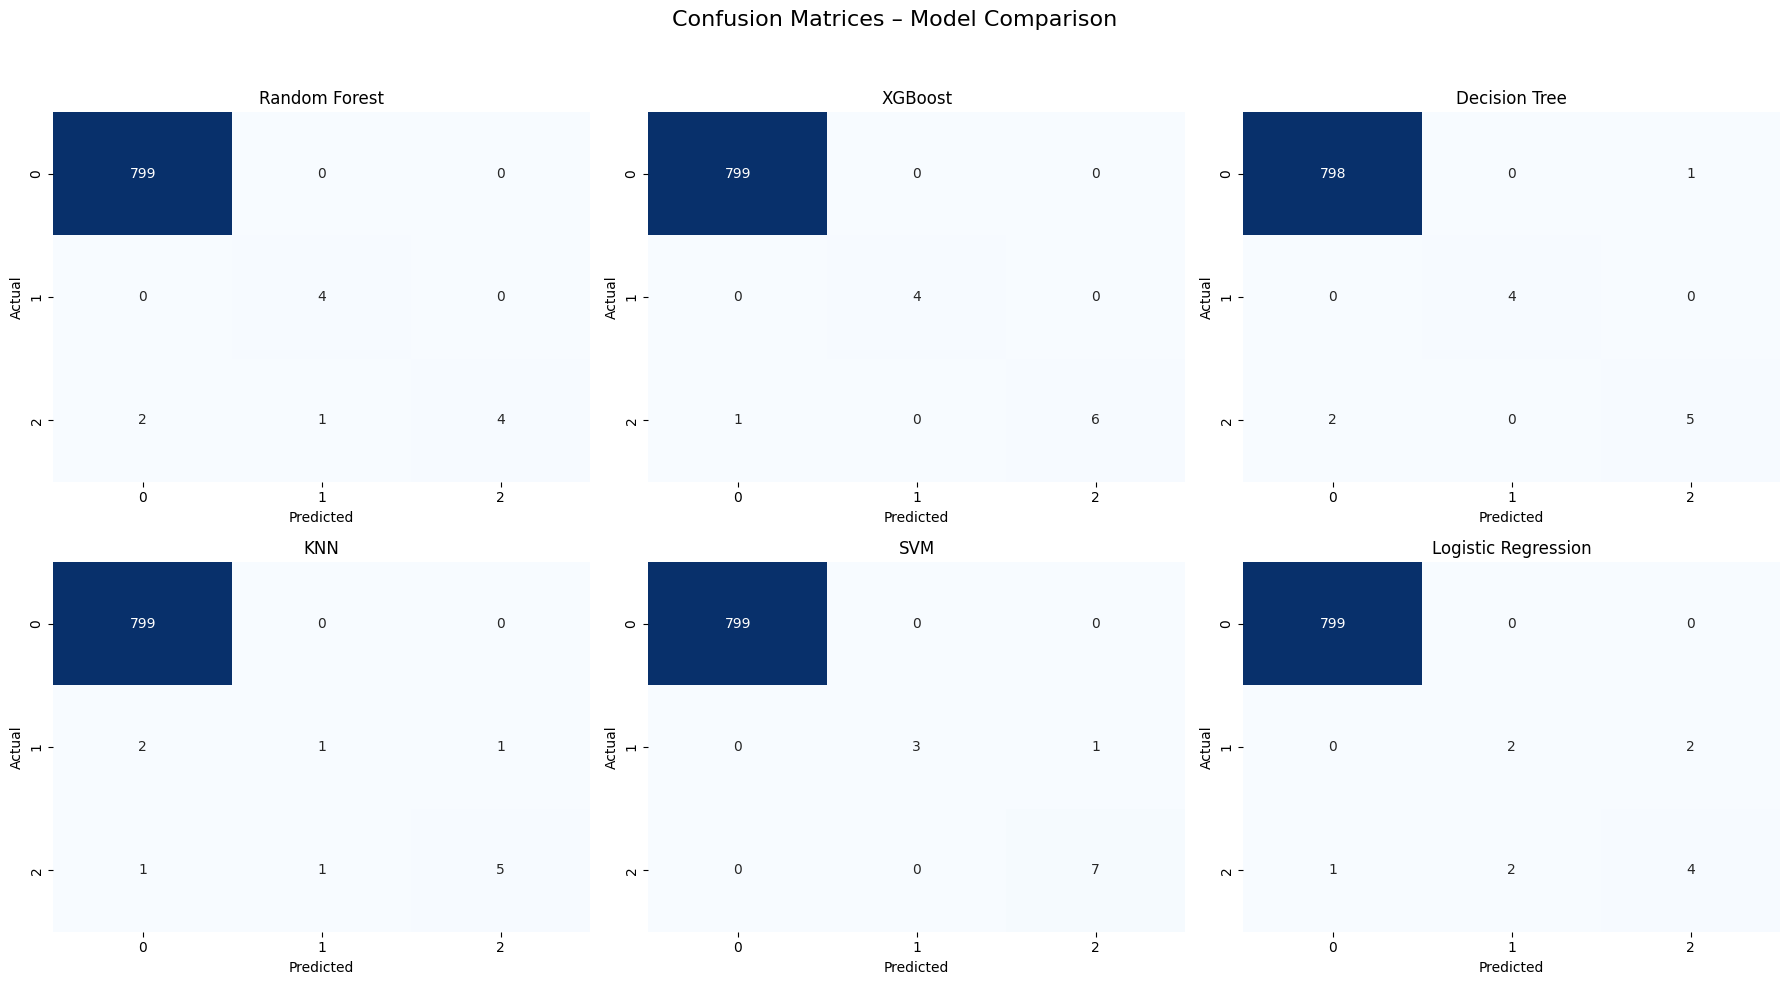

In [172]:
n_models = len(models)
cols = 3
rows = math.ceil(n_models / cols)

plt.figure(figsize=(18, 10))

for i, (model_name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(rows, cols, i)
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False
    )
    plt.title(model_name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.suptitle("Confusion Matrices – Model Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# NORMALIZED CONFUSION MATRIX

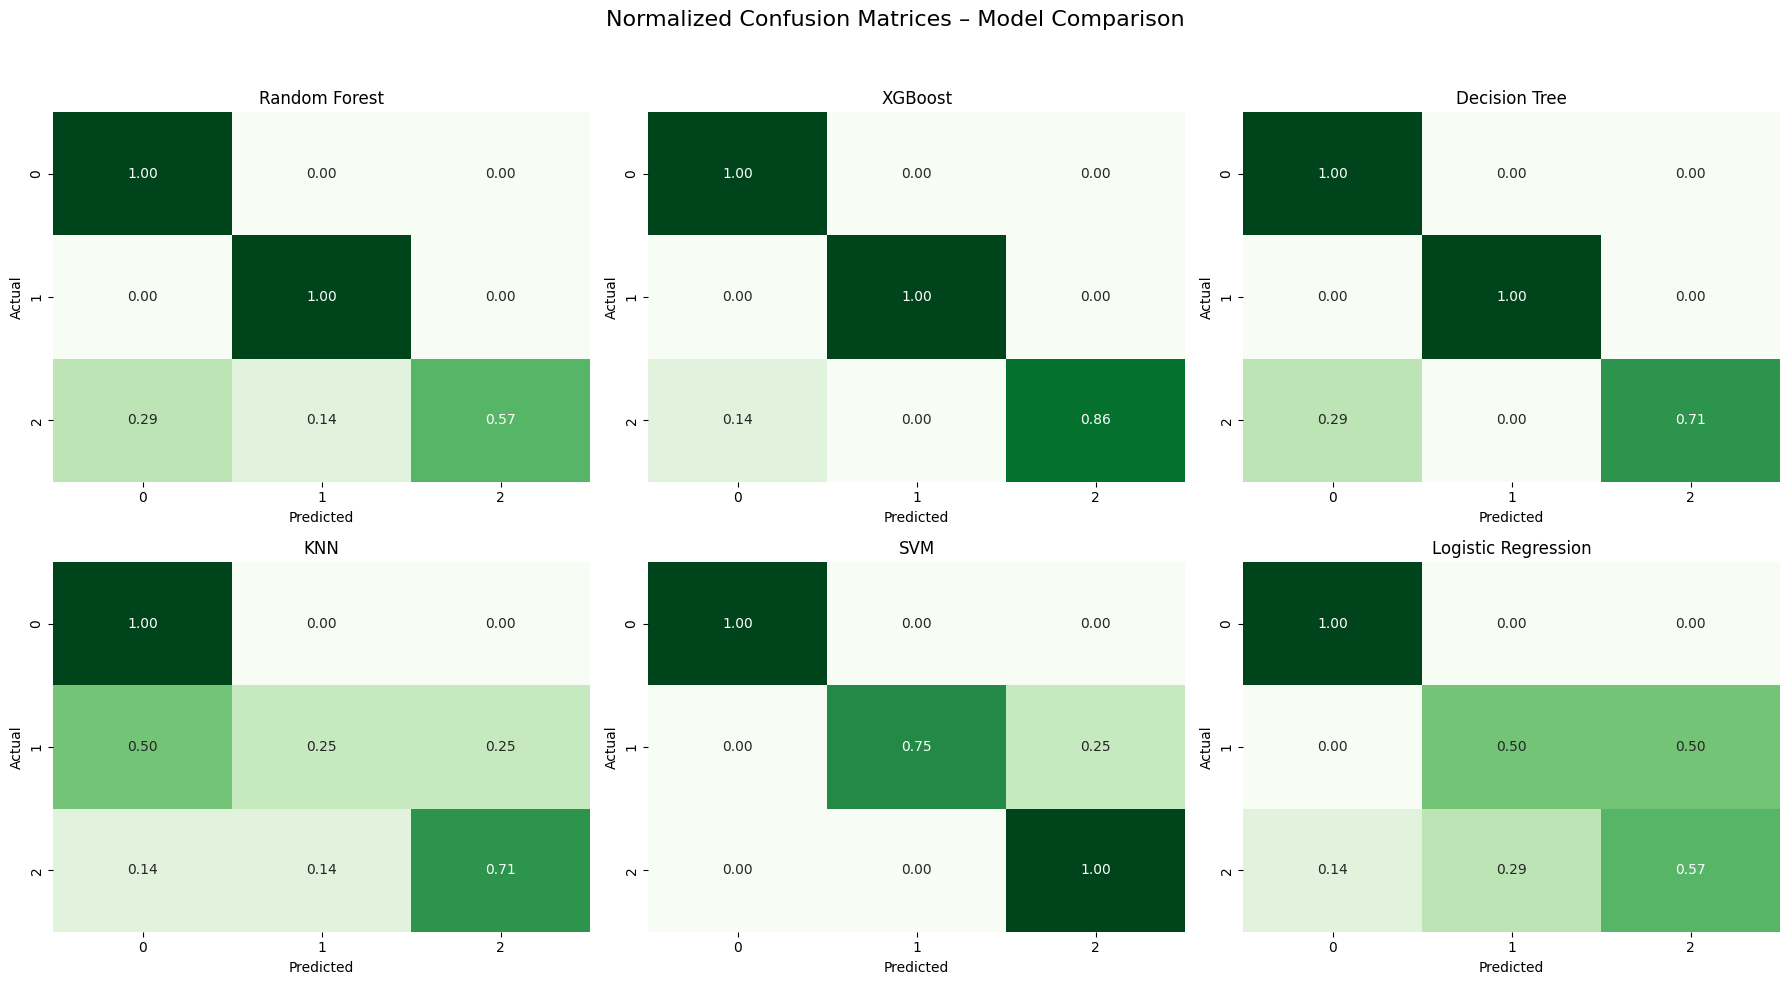

In [173]:
plt.figure(figsize=(18, 10))

for i, (model_name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, normalize='true')

    plt.subplot(rows, cols, i)
    sns.heatmap(
        cm,
        annot=True,
        fmt='.2f',
        cmap='Greens',
        cbar=False
    )
    plt.title(model_name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.suptitle("Normalized Confusion Matrices – Model Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()